In [1]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from stacked_plots import StackedBarChart
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [2]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
mtd_interval = [200]
network_size = [150]
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'

static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metrics = ["all_features"] + static_features + time_features



{'random': {'ASR': 1.4722222222222223, 'time_to_compromise': 1.4659171297011173, 'attack_path_exposure': 0.9358105558657954, 'ROA': 0.8333602423320229, 'risk': 0.9295818359469153}, 'alternative': {'ASR': 1.4583333333333335, 'time_to_compromise': 1.4450191486143427, 'attack_path_exposure': 0.9357752473230252, 'ROA': 0.8333602423320229, 'risk': 0.9486668488685682}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7163759880443128, 'attack_path_exposure': 0.9343932486908034, 'ROA': 0.8333602423320229, 'risk': 1.0383848656780987}}


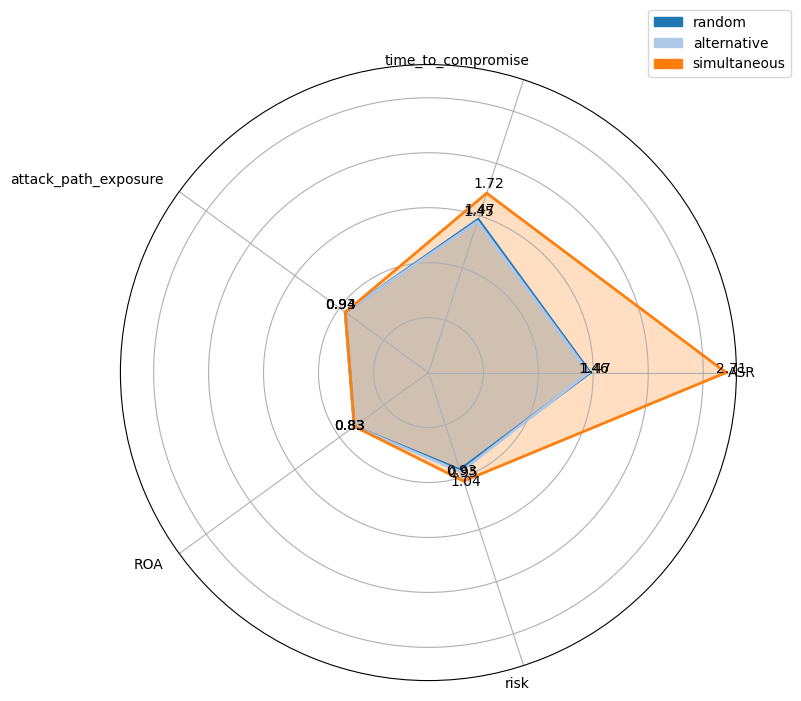

In [3]:
radar = RadarPlot("all_features",epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "other_scheme", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["random", "alternative", "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

In [4]:
other_schemes =pd.DataFrame(schemes_data)

In [5]:
other_schemes

,random,alternative,simultaneous
ASR,1.472222,1.458333,2.708333
time_to_compromise,1.465917,1.445019,1.716376
attack_path_exposure,0.935811,0.935775,0.934393
ROA,0.833360,0.833360,0.833360
risk,0.929582,0.948667,1.038385


In [6]:
import pandas as pd

# Create an empty DataFrame to store all the data for all metrics
all_model_data = pd.DataFrame()

for metric in metrics:
    models = [
        metric,
        f"{metric}_CompleteTopologyShuffle",
        f"{metric}_IPShuffle",
        f"{metric}_OSDiversity",
        f"{metric}_ServiceDiversity"
    ]
    
        
    # Initialize the chart for the current model
    chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
    weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
    
    # Get data for current model
    schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


    
    
    # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
    if all_model_data.empty:
        all_model_data = schemes_data
    else:
        all_model_data = pd.concat([all_model_data, schemes_data], axis=1)





In [7]:
# Now all_schemes_data contains the concatenated data from all models as columns
all_model_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg,overall_mttc_avg_CompleteTopologyShuffle,overall_mttc_avg_IPShuffle,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity
mtd_interval,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MEF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ASR,1.527778,1.500000,1.666667,1.500000,1.500000,1.562500,1.500000,1.666667,1.520833,1.500000,...,1.527778,1.500000,1.666667,1.520833,1.500000,1.527778,1.500000,1.708333,1.500000,1.472222
time_to_compromise,1.531923,1.472921,1.496850,1.698884,1.636721,1.539680,1.459505,1.510210,1.687562,1.611772,...,1.533648,1.444419,1.559871,1.715449,1.607612,1.521410,1.479874,1.540029,1.700349,1.618370
host_compromise_ratio,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,...,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652
network_size,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
exposed_endpoints,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
attack_path_exposure,2.440142,2.259621,1.968381,2.701346,2.627010,2.481152,2.199308,1.951468,2.635384,2.608279,...,2.444182,2.227515,1.928210,2.692724,2.627622,2.460476,2.211664,1.859720,2.659974,2.585116
ROA,0.952065,1.103992,0.955846,0.966369,0.984193,1.013113,1.061796,1.096744,0.943407,0.996679,...,1.187526,1.074271,1.176215,0.919174,0.892322,0.924246,0.997402,0.986353,1.044104,1.005516
risk,1.033532,1.098857,1.000113,0.974527,0.995954,0.943300,1.113337,1.146568,0.987845,0.973206,...,1.133734,1.083501,1.128169,1.060990,0.870949,1.026821,1.040736,0.982109,1.053469,1.002813


In [8]:
data = all_model_data.T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()

Normalized Weighted Metrics for Each Scheme:
random          5.636892
alternative     5.621155
simultaneous    7.230848
Name: sum, dtype: float64


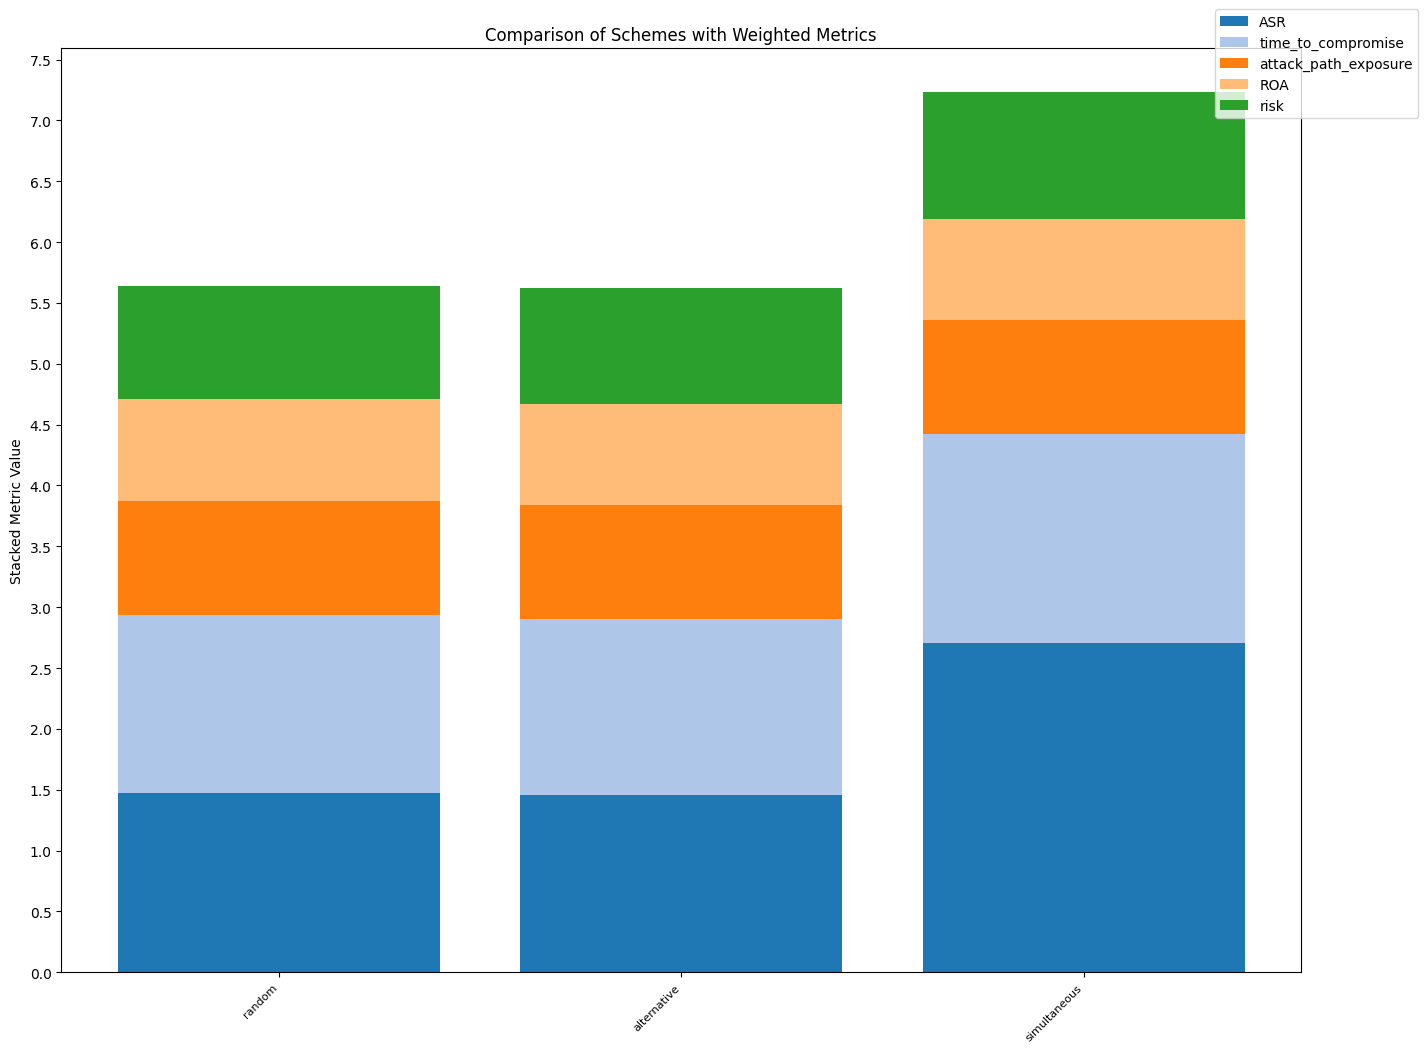

In [9]:
chart.plot_n_schemes(other_schemes, weights=weights)

In [22]:
pd.DataFrame(data) other_schemes

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg,overall_mttc_avg_CompleteTopologyShuffle,overall_mttc_avg_IPShuffle,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity
ASR,1.527778,1.500000,1.666667,1.500000,1.500000,1.562500,1.500000,1.666667,1.520833,1.500000,...,1.527778,1.500000,1.666667,1.520833,1.500000,1.527778,1.500000,1.708333,1.500000,1.472222
time_to_compromise,1.531923,1.472921,1.496850,1.698884,1.636721,1.539680,1.459505,1.510210,1.687562,1.611772,...,1.533648,1.444419,1.559871,1.715449,1.607612,1.521410,1.479874,1.540029,1.700349,1.618370
attack_path_exposure,2.440142,2.259621,1.968381,2.701346,2.627010,2.481152,2.199308,1.951468,2.635384,2.608279,...,2.444182,2.227515,1.928210,2.692724,2.627622,2.460476,2.211664,1.859720,2.659974,2.585116
ROA,0.952065,1.103992,0.955846,0.966369,0.984193,1.013113,1.061796,1.096744,0.943407,0.996679,...,1.187526,1.074271,1.176215,0.919174,0.892322,0.924246,0.997402,0.986353,1.044104,1.005516
risk,1.033532,1.098857,1.000113,0.974527,0.995954,0.943300,1.113337,1.146568,0.987845,0.973206,...,1.133734,1.083501,1.128169,1.060990,0.870949,1.026821,1.040736,0.982109,1.053469,1.002813


In [29]:
combined_data = pd.concat([pd.DataFrame(data), other_schemes], axis=1)

Normalized Weighted Metrics for Each Scheme:
all_features                                         7.485439
all_features_CompleteTopologyShuffle                 7.435391
all_features_IPShuffle                               7.087856
all_features_OSDiversity                             7.841126
all_features_ServiceDiversity                        7.743878
host_compromise_ratio                                7.539746
host_compromise_ratio_CompleteTopologyShuffle        7.333947
host_compromise_ratio_IPShuffle                      7.371657
host_compromise_ratio_OSDiversity                    7.775031
host_compromise_ratio_ServiceDiversity               7.689935
exposed_endpoints                                    7.670679
exposed_endpoints_CompleteTopologyShuffle            7.175936
exposed_endpoints_IPShuffle                          7.005981
exposed_endpoints_OSDiversity                        7.834638
exposed_endpoints_ServiceDiversity                   7.970807
attack_path_exposure     

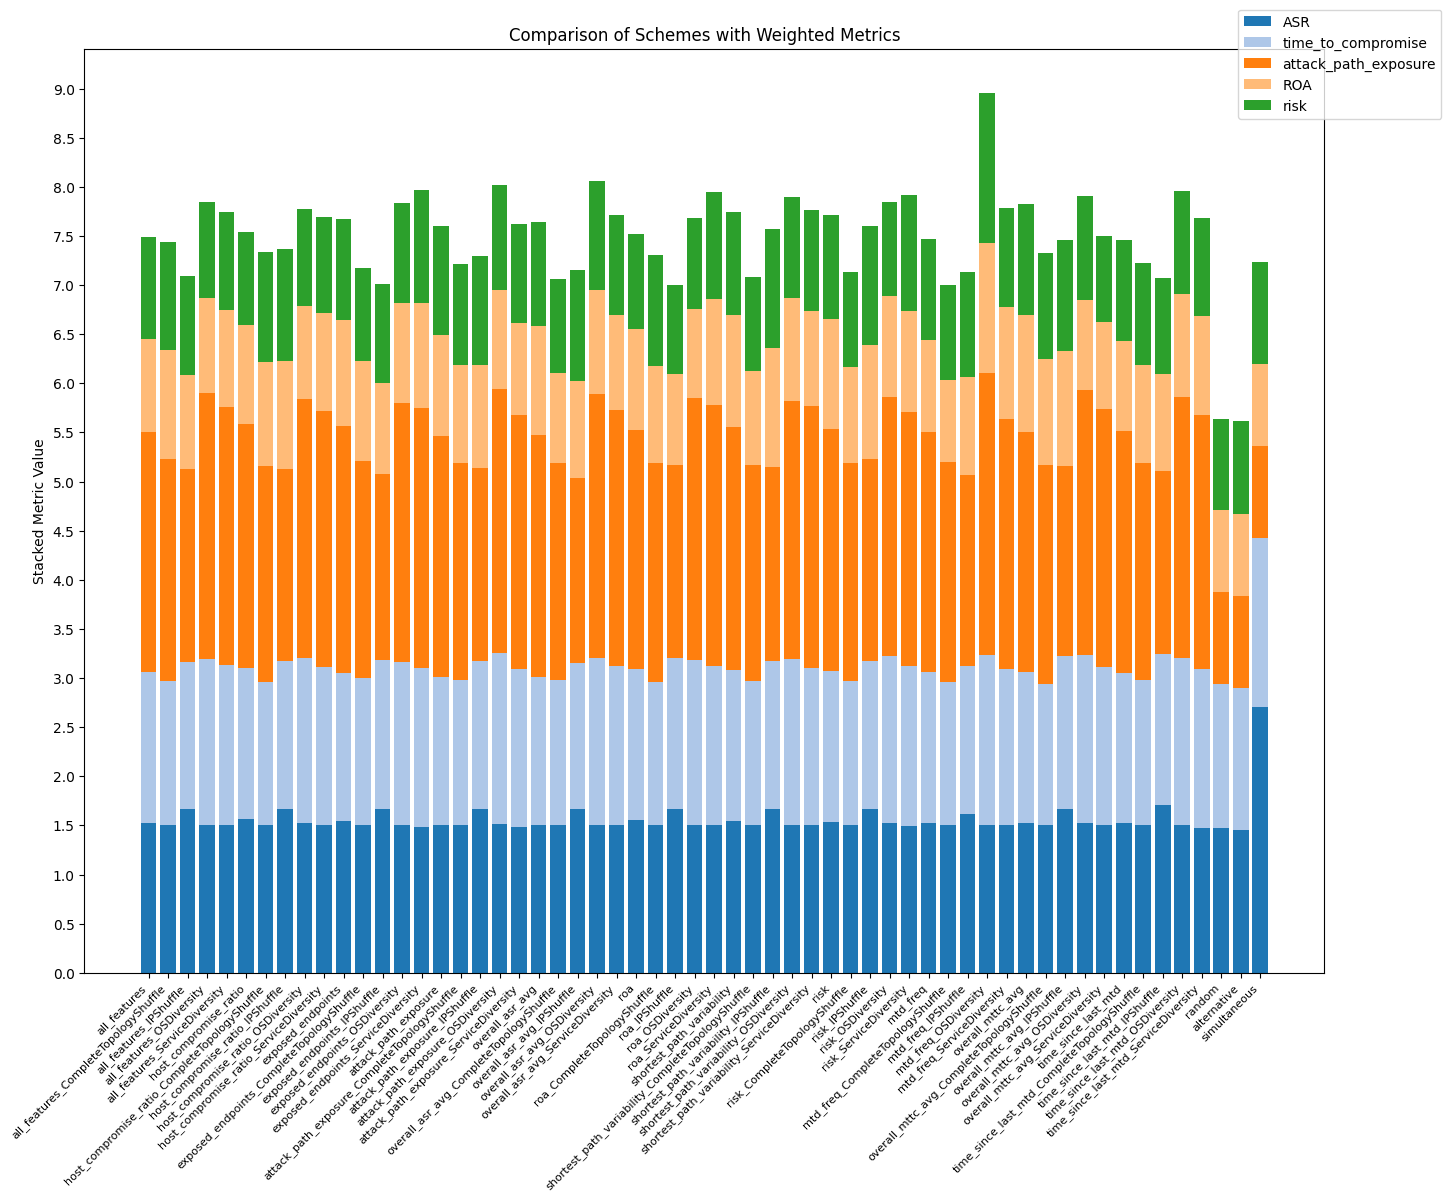

In [ ]:
chart.plot_n_schemes(combined_data, weights=weights)

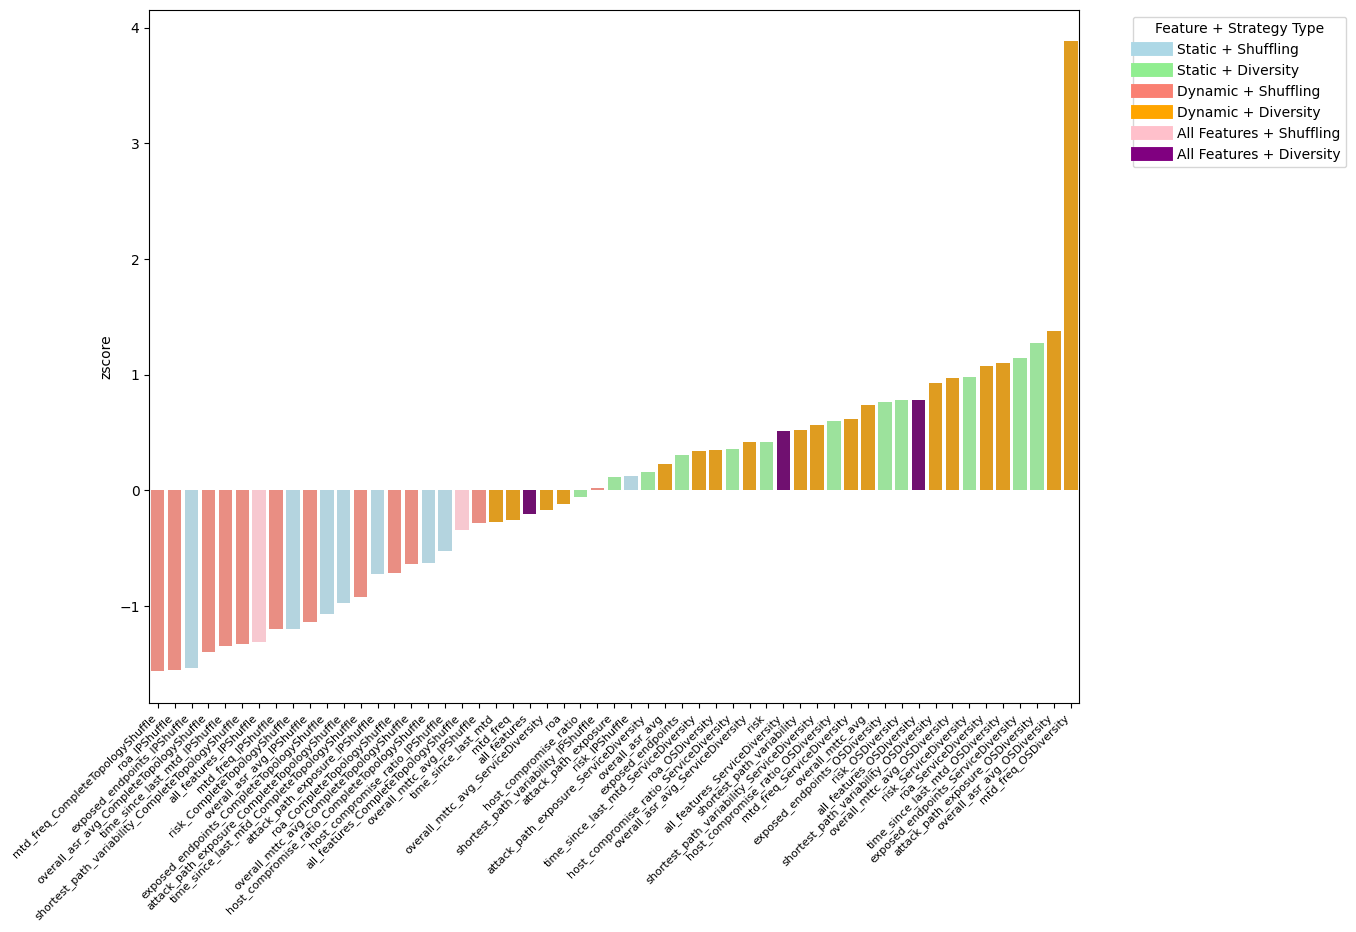

In [11]:
chart.normalized_chart("zscore")

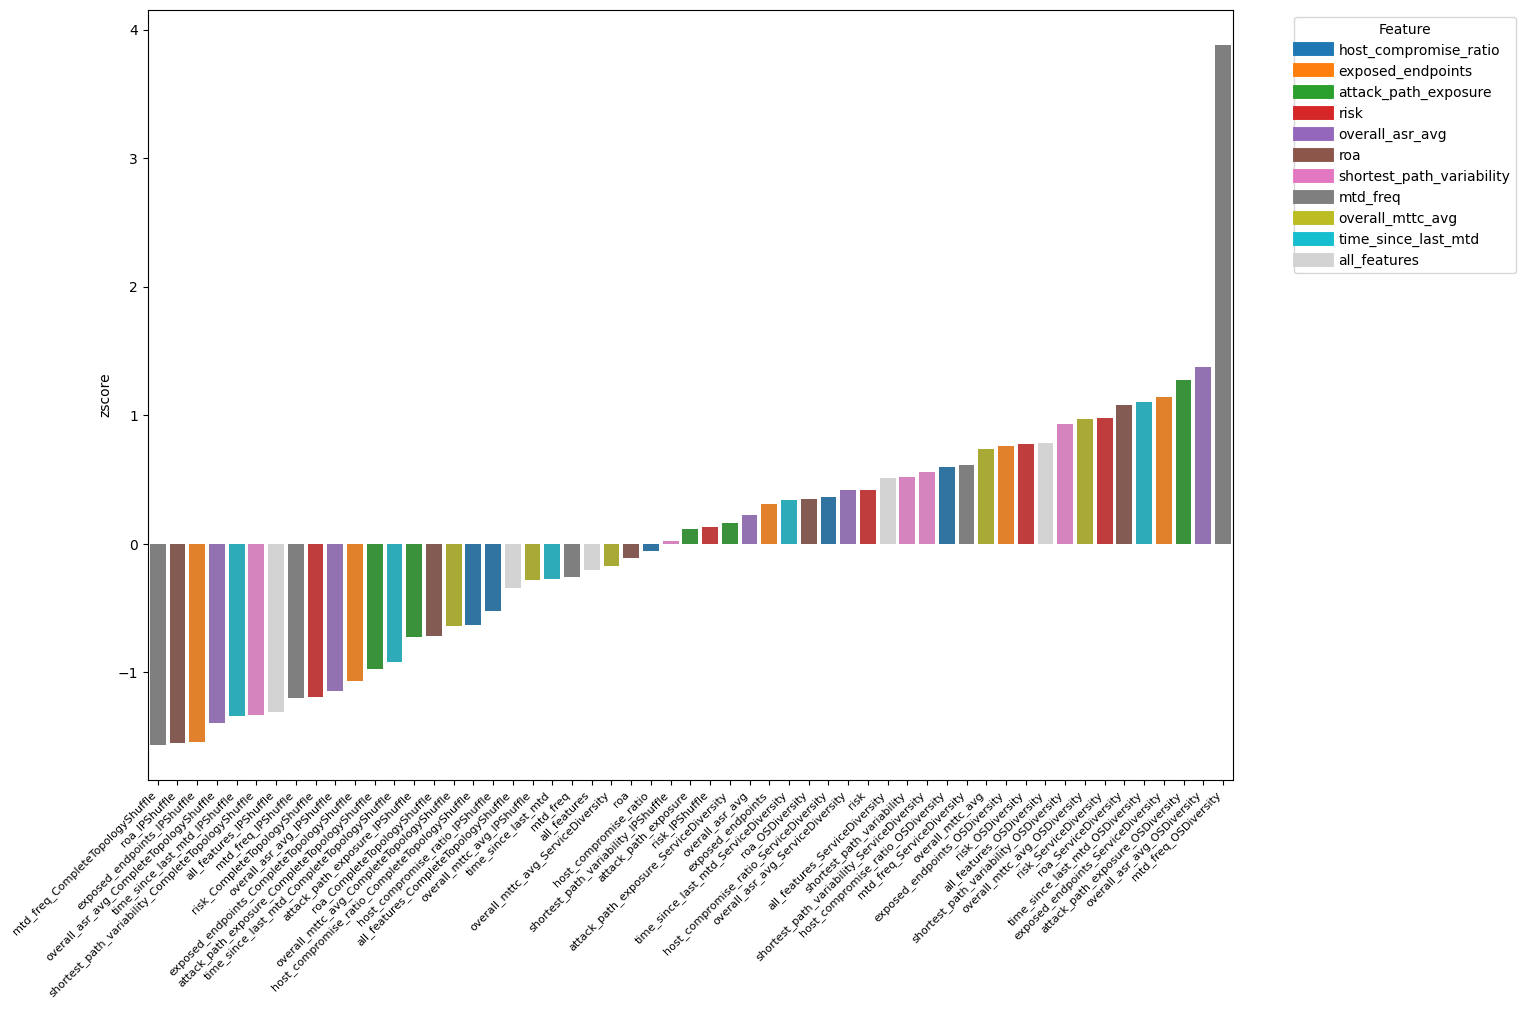

In [12]:
chart.features_only_chart('zscore')

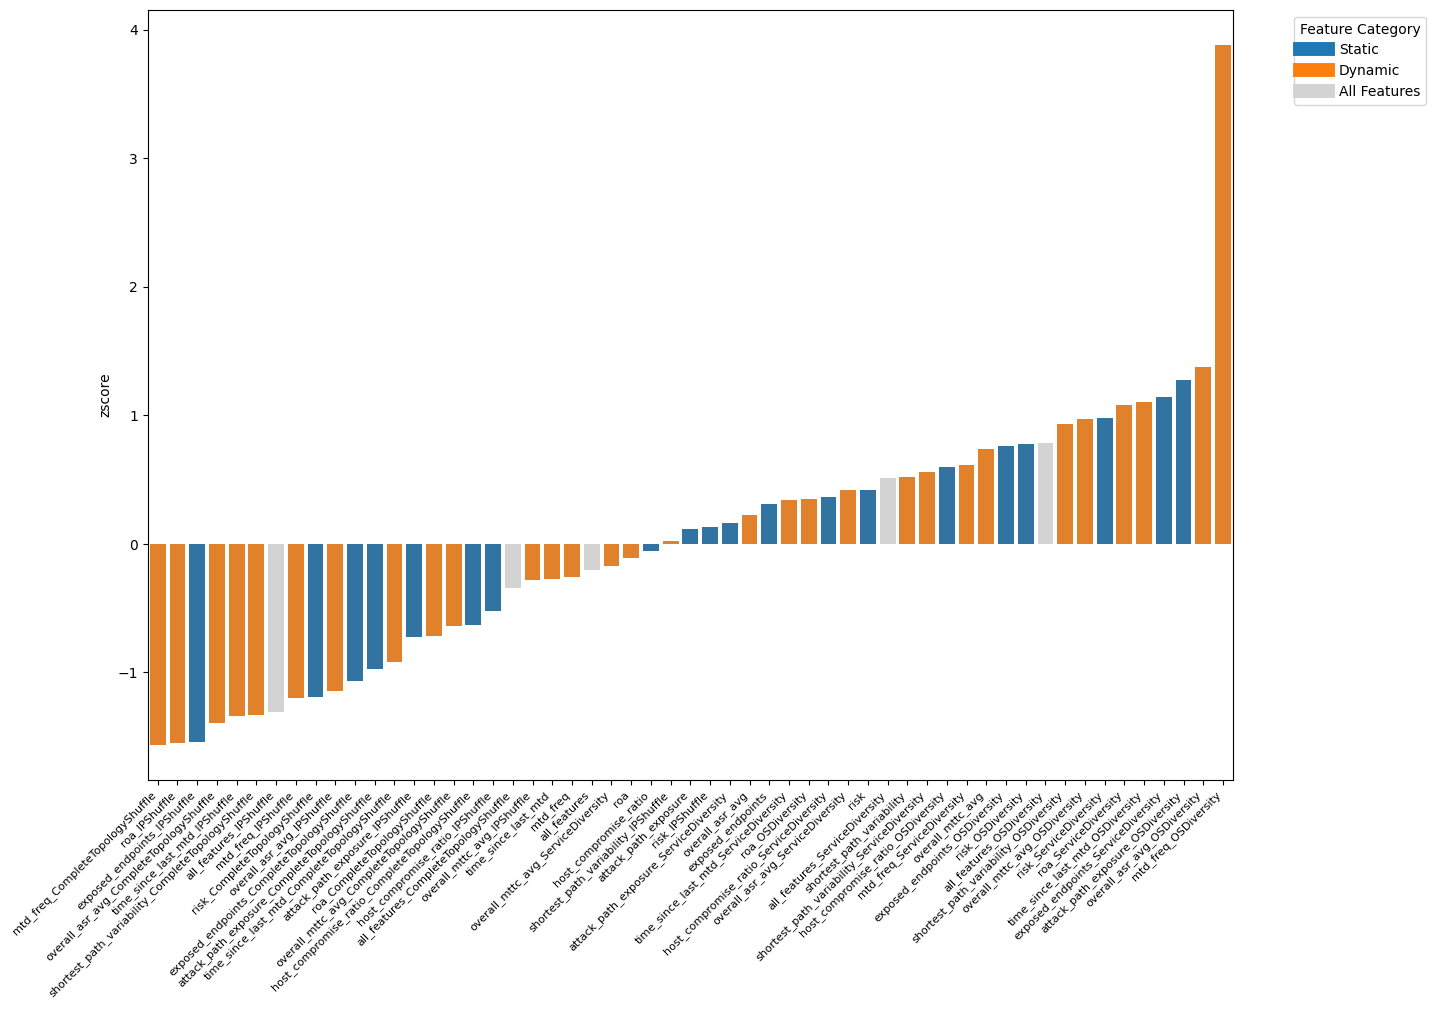

In [13]:
chart.feature_type_only_chart("zscore")

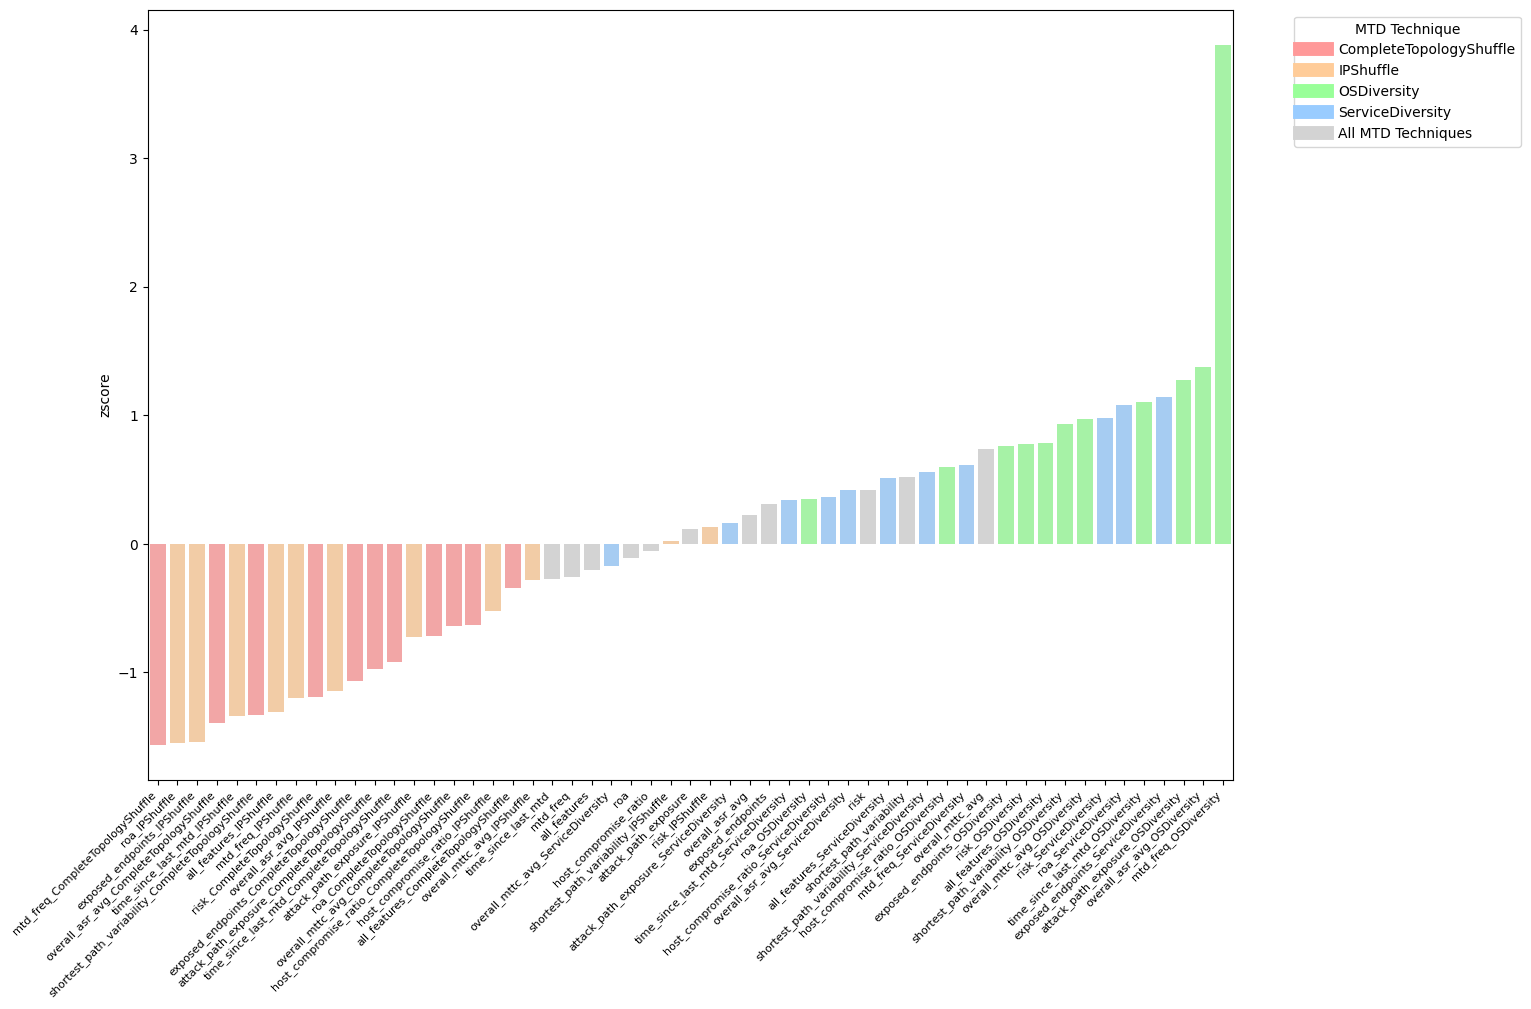

In [14]:
chart.mtd_techniques_chart('zscore')

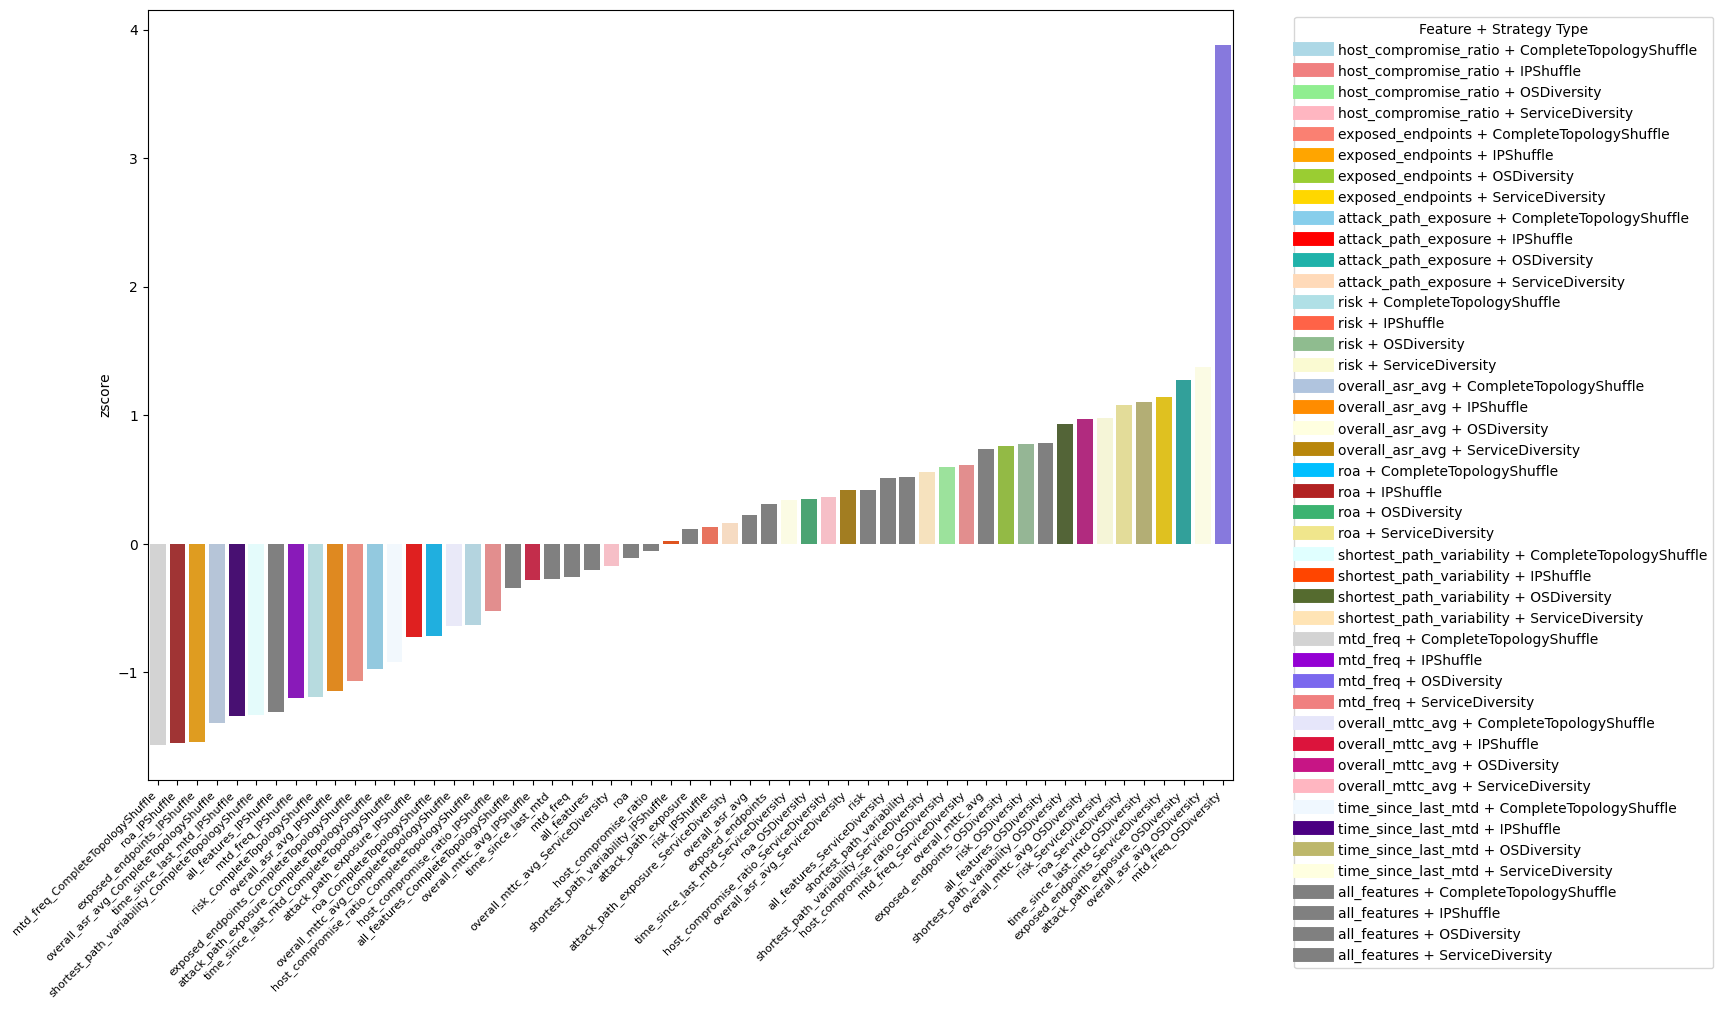

In [15]:
chart.all_combinations_chart('zscore')

In [16]:
import seaborn as sns


In [17]:
chart.weighted_data['sum'] = (chart.weighted_data['sum'] - 7.230848)/7.230848
chart.weighted_data.sort_values(axis=0, by="minmax") 

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
mtd_freq_CompleteTopologyShuffle,1.500000,1.456367,2.241649,0.833052,0.966269,-0.032294,-1.563389,0.000000
roa_IPShuffle,1.666667,1.534928,1.968381,0.921160,0.911011,-0.031629,-1.550024,0.002454
exposed_endpoints_IPShuffle,1.666667,1.515584,1.892674,0.928857,1.002199,-0.031098,-1.539370,0.004410
overall_asr_avg_CompleteTopologyShuffle,1.500000,1.478983,2.206705,0.919617,0.952277,-0.023962,-1.395988,0.030738
time_since_last_mtd_IPShuffle,1.708333,1.540029,1.859720,0.986353,0.982109,-0.021340,-1.343297,0.040413
shortest_path_variability_CompleteTopologyShuffle,1.500000,1.469934,2.202590,0.948762,0.960553,-0.020608,-1.328589,0.043114
all_features_IPShuffle,1.666667,1.496850,1.968381,0.955846,1.000113,-0.019775,-1.311867,0.046184
mtd_freq_IPShuffle,1.616667,1.504913,1.945681,1.001091,1.060088,-0.014163,-1.199099,0.066890
risk_CompleteTopologyShuffle,1.500000,1.474495,2.217894,0.976695,0.961107,-0.013920,-1.194232,0.067784
overall_asr_avg_IPShuffle,1.666667,1.491538,1.877828,0.987428,1.125691,-0.011298,-1.141547,0.077458


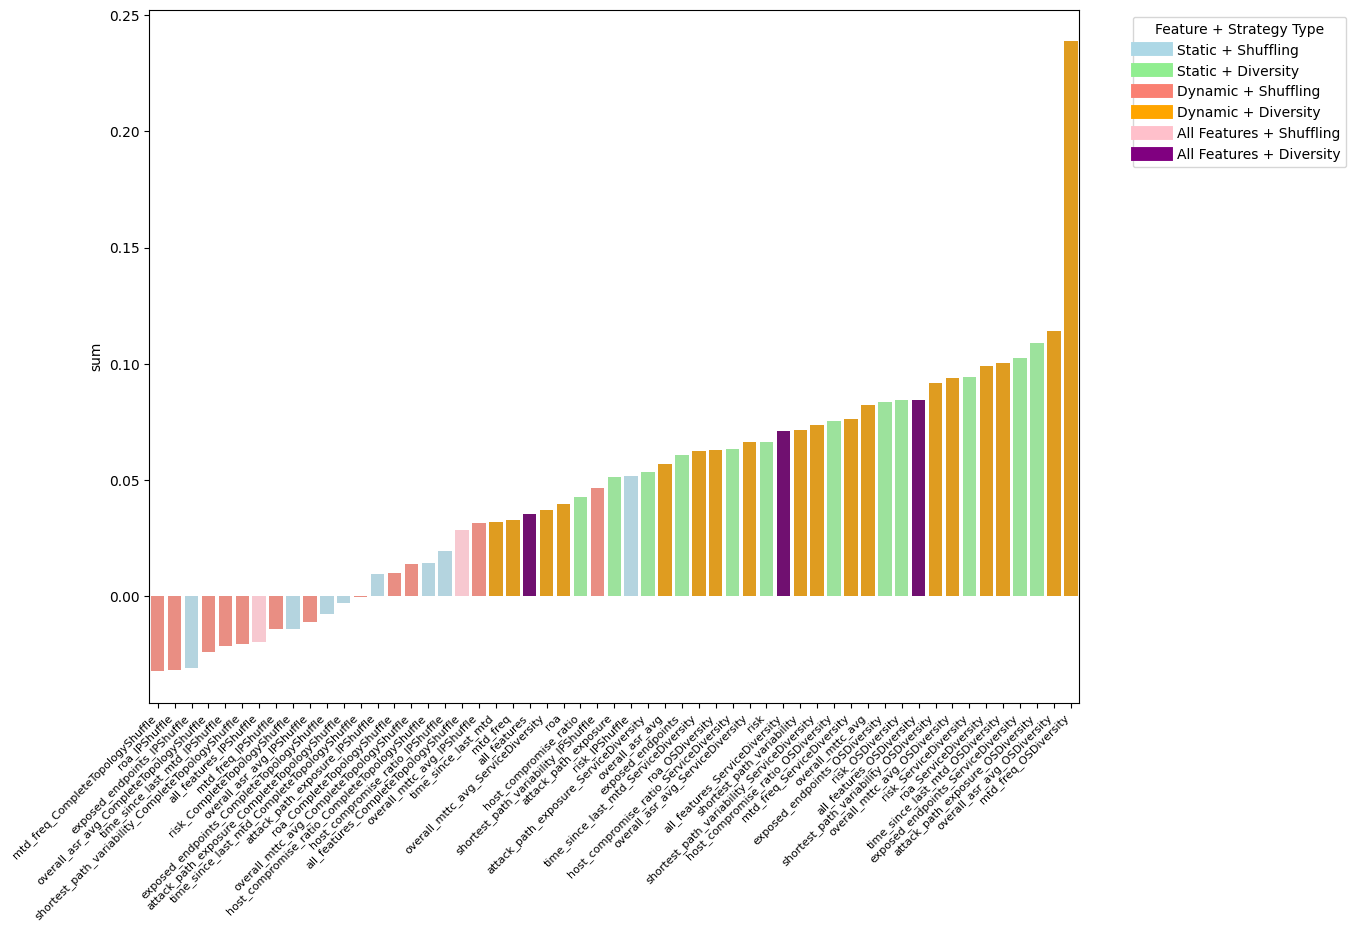

In [18]:
chart.normalized_chart('sum')

In [19]:
simultaneous_comparison = chart.weighted_data.sort_values(axis=0, by="minmax")['sum']

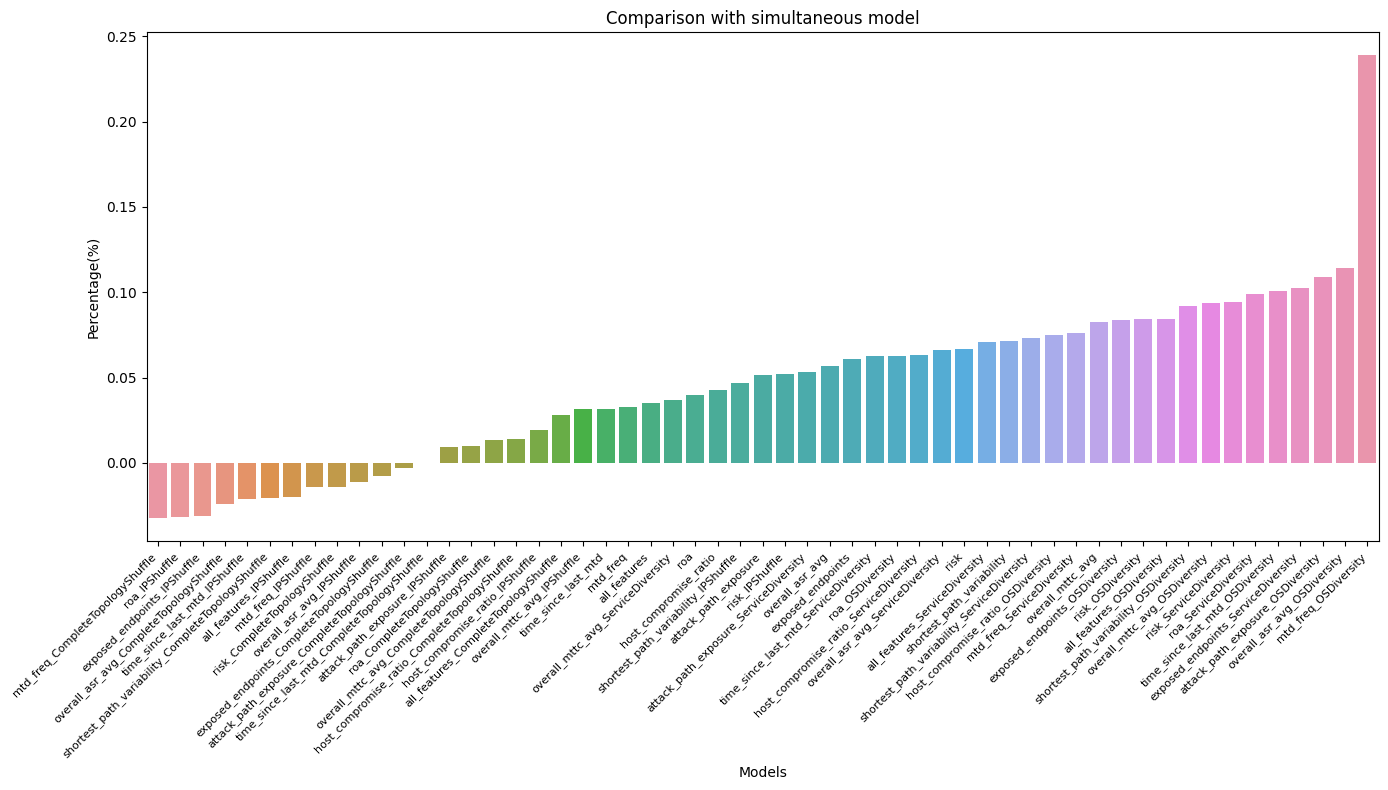

In [20]:
# Set up the figure and axis with a larger size
fig, ax = plt.subplots(figsize=(14, 8))  # Increase the figure size

# Plot the bar chart
sns.barplot(x=simultaneous_comparison.index, y=simultaneous_comparison.values, ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust fontsize as needed

# Add labels and title if needed
ax.set_xlabel('Models')
ax.set_ylabel('Percentage(%)')
ax.set_title('Comparison with simultaneous model')

# Show the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()